# Bayesian Inference for Binomial Proportion

For a random variable to be described by a Binomial distribution parameterised as $Y \sim \text{Binomial}(n,\pi)$ with the parameter prior described as $g(\pi)$ and the likelihood of the prior given the data (which is equivalent to the probability of seeing the data given the prior) being represented as $f(y | \pi)$, the posterior distribution of the parameters become proportional to $g(\pi) \times f(y | \pi)$

If $g(\pi)$ is not described by a Beta distribution, that's when shit hits the fan, and what this notebook is all about. 

### Non-Beta Priors

A student is constructing their prior belief about $π$, the proportion of Hamilton residents who support building a casino in Hamilton.

Let the prior beliefs about $\pi$  be quantified as

$$ g(\pi) =  \begin{array}{cc}
  \Bigg\{ & 
    \begin{array}{cc}
      10\pi & \text{for}\; 0\leq\pi\leq 0.2 \\
      2 & \text{for}\; 0.2\leq\pi\leq 0.3 \\
      5-10\pi & \text{for}\; 0.3\leq\pi\leq 0.5
    \end{array}
\end{array}$$

### The Data

The student takes a random sample of $n = 100$
Hamilton residents and find their views on the casino. Out of the random sample,
$y = 26$ said they support building a casino in Hamilton.

We want to find the posterior distribution of $\pi$

$$ 
g(\pi | y) = \frac{g(\pi) \times f(y | \pi)}{\int_{0}^{1}g(\pi) \times f(y | \pi) d\pi} 
$$

We aim to numerically integrate to find the denominator for the above non-beta prior. 

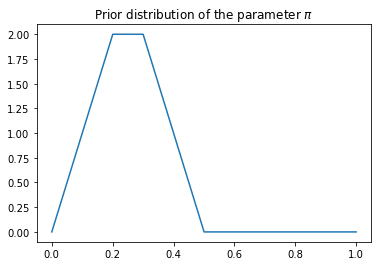

In [80]:
pi = np.linspace(0, 1, 10000)
prior = (pi<0.2)*g1(pi) + ((pi>0.2) & (pi<0.3))*g2(pi) + ((pi>0.3) & (pi<0.5))*g3(pi)
plt.plot(pi, prior)
plt.title('Prior distribution of the parameter $\pi$')
plt.show()

### Integration as the Limit of a Sum

We break the domain of integration in the denominator into three parts. 

$$ \int_{0}^{1}g(\pi) \times f(y | \pi) d\pi = \int_{0}^{0.2}g_1(\pi) \times f(y | \pi) d\pi + \int_{0.2}^{0.3}g_2(\pi) \times f(y | \pi) d\pi + \int_{0.3}^{0.5}g_3(\pi) \times f(y | \pi) d\pi$$

where $g_i(\pi)$ refer to each of the pieces of the piecewise continuous prior distribution $g(\pi)$

For example, $g_1(\pi) = 10\pi$

We evaluate the three integrals numerically below. 

In [81]:
from scipy.special import comb 

def g1(x):
    return 10*x

def g2(x):
    return 2

def g3(x):
    return 5 - 10*x

def f(y, pi, n = 100):
    return comb(n, y, exact = True, repetition = False)*pi**(y) * (1-pi)**(n-y)

In [129]:
# Number of finite steps for integration
num_steps = 500

Evaluating $$ \int_{0}^{0.2}g_1(\pi) \times f(y | \pi) d\pi \sim \sum_{i = 1}^{{num-steps}} g_1(\pi)*f(y|\pi)*\Delta\pi $$ 

In [130]:
import numpy as np

int_1 = 0
for pi in np.linspace(0, 0.2, num = num_steps):
    int_1 = int_1 + g1(pi)*f(pi = pi, y = 26, n = 100)*(0.2/num_steps)
int_1

0.001143225162014474

Evaluating $$ \int_{0.2}^{0.3}g_2(\pi) \times f(y | \pi) d\pi $$

In [131]:
int_2 = 0
for pi in np.linspace(0.2, 0.3, num = num_steps):
    int_2 = int_2 + g2(pi)*f(pi = pi, y = 26, n = 100)*(0.1/num_steps)
int_2

0.014481073765716106

Evaluating $$ \int_{0.3}^{0.5}g_3(\pi) \times f(y | \pi) d\pi$$

In [132]:
int_3 = 0
for pi in np.linspace(0.3, 0.5, num = num_steps):
    int_3 = int_3 + g3(pi)*f(pi = pi, y = 26, n = 100)*(0.2/num_steps)
int_3

0.0035555471364470867

All combining $$ \int_{0}^{1}g(\pi) \times f(y | \pi) d\pi $$

In [133]:
denominator = int_1 + int_2 + int_3
denominator

0.019179846064177667

Plotting the posterior involves expressing the numerator in 

$$ 
g(\pi | y) = \frac{g(\pi) \times f(y | \pi)}{\int_{0}^{1}g(\pi) \times f(y | \pi) d\pi} 
$$

as a function of $\pi$ and evaluating it for all values of $\pi \in [0,1]$. 

This will give us the general shape of the curve.

To get the posterior probability distribution, we have to divide by the denominator 

In [134]:
pi = np.linspace(0,1,num_steps)
posterior = ((pi<0.2)*g1(pi)*f(y = 26, pi = pi, n = 100) + ((pi>0.2) & (pi<0.3))*g2(pi)*f(y = 26, pi = pi, n = 100) + ((pi>0.3) & (pi<0.5))*g3(pi)*f(y = 26, pi = pi, n = 100))/denominator

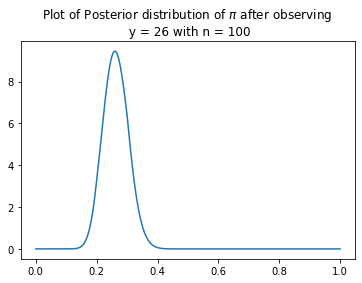

In [135]:
plt.plot(pi, posterior)
plt.title('Plot of Posterior distribution of $\\pi$ after observing \n y = 26 with n = 100')
plt.show()